### Messy and Dirty Data

In [ ]:
# 분석을 들어갈 것.
# 현실세계 데이터는 messy 와 dirty 하다!
# messy, dirty 한 데이터(중복, missing 데이터 등등) 를 깔끔하게 하는 것이 data cleaning
# GIGO -> garbage in, garbage out
# 오늘은 판다스를 이용해서 데이터 클리닝을 할 것. => 정말 중요함

In [ ]:
# 알고리즘 별로 요구하는 데이터의 형태가 다름. 그러면 전처리 기법이 도 달라짐.
# 따라서 전처리 기법, shape 바꾸기 등이 달라짐.
# 데이터 받아서 분석을 준비하는 과정이 data wrangling. == data cleaning
# 회사에서는 협업을 함.

In [ ]:
# data wrangling vs data cleaning
#  -> 데이터 변형, 처리할 수 있도록 바꾸는 전체적인 과정. wrangling 안에 cleaning이 있을 수 있음

In [ ]:
# 판다스에서 data preparation을 다 할 수 있다.
# Data Preparation
# => Data cleaning + Feature Engineering

In [ ]:
# 데이터 분석은 데이터에 문제가 너무 많아서 문제를 없애는데 시간을 많이 할애한다.
# 문제의 원인은 '인간'과 '기계'.
# 문제가 안 일어나게 하는 게 우리의 역할.

### Detecting Errors

In [ ]:
# 경험이 필요함.

In [ ]:
# 1. 눈으로 확인하는 방법
# 2. scheme 작성 -> 잘못됐는지 안잘못됐는지 정하는 규격; ex. DB(참조 무결성), json, protocol buffer 등
#   => DB는 필수적인 능력임

In [ ]:
# pandera; pandas 는 스키마가 없는데 이걸 이용하면 자동화 가능

### Preventing Errors

In [ ]:
# 빈번한 실수를 막자!
# 데이터 포멧에 따라서 validation 도 되고 scheme 도 있으면 편할 것.
# 대표적인 것이 Apache Parquet
# 하둡 기반

In [ ]:
# serialization formats; 잘 짜여진 포맷
# digital signature
# Transaction -> DB의 중요성이 큼

In [ ]:
# ETL
# Extract - Transform - Load(DataWarehouse)
# ELT(요새)
# Extract = Load(DataLake) - Transform

# 데이터 파이프라인

In [ ]:
# 이런 것들은 실무에서는 자기만의 방식이 있고 경계가 모호하다

In [ ]:
# ETL 은 대부분 데이터 개발자들이 많이 함.

In [ ]:
# automation 자동화
# tidy data = narrow data = long form <- 논문으로 보고 판다스로 코딩할 것

### Process

In [ ]:
# 절차가 중요함

In [ ]:
# 실무에서 나의 경쟁력을 키우는 것이 DB

### Fixing Errors

### Pandas 를 통한 Data Cleaning

In [1]:
import seaborn as sns

In [2]:
tips = sns.load_dataset('tips')

In [4]:
tips # DataFrame

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [ ]:
# 처음에 하는 일은 데이터프레임 형태로 불러와야 함
# read_ 형태로
# 판다스의 한계가 있음 => scheme 가 없어서 validation 이 잘 안됨.
# 그래서 pandera 로 함.
# 판다스로는 data cleaning 을 할 수 있음.

In [ ]:
# 내 눈으로 클리닝 하기
# 데이터를 찍어야 함 -> 데이터를 가져와야 함.
# 판다스의 기능은 numpy에서 가져옴.
# 첫번째는 컬럼 가져오는 것.

#### columns 가져오기

In [5]:
tips.columns
# dict 의 key 와 비슷한 역할

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [6]:
tips['tip'] # structured array

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [7]:
tips[['tip']] # fancy indexing => 차원 그대로 유지 -> 데이터 프레임으로 가져옴

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [8]:
tips.tip # record array 의 기능

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [ ]:
# 즉 컬럼 가져올 때 내가 넘파이에서 알고 있던 기능으로 가능함. 넘파이에서 지원한 기능을 가져온 것.
# 1. structured array
# 2. record array
# 3. fancy indexing
# 4. select_dtypes    => 내가 원하는 컬럼 가져올 수 있음
# 5. filter           => 내가 원하는 컬럼 가져올 수 있음

In [ ]:
# 넘파이에서 자기만의 메소드를 활용해서 뽑아오는 애들을 가져왔을 것.

In [9]:
tips.dtypes   # 각각의 데이터 타입

total_bill     float64
tip            float64
sex           category
smoker        category
day           category
time          category
size             int64
dtype: object

In [10]:
tips.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [11]:
tips.index

RangeIndex(start=0, stop=244, step=1)

In [12]:
# 특정 데이터 타입만 뽑아내자
tips.select_dtypes('category')
# Signature: tips.select_dtypes(include=None, exclude=None) -> 'DataFrame'

,sex,smoker,day,time
0,Female,No,Sun,Dinner
1,Male,No,Sun,Dinner
2,Male,No,Sun,Dinner
3,Male,No,Sun,Dinner
4,Female,No,Sun,Dinner
...,...,...,...,...
239,Male,No,Sat,Dinner
240,Female,Yes,Sat,Dinner
241,Male,Yes,Sat,Dinner
242,Male,No,Sat,Dinner


In [13]:
tips.select_dtypes(['category','int64'])
# 한 개일때는 문자열(list도 가능), 두 개 이상일 때는 list 로 줌

,sex,smoker,day,time,size
0,Female,No,Sun,Dinner,2
1,Male,No,Sun,Dinner,3
2,Male,No,Sun,Dinner,3
3,Male,No,Sun,Dinner,2
4,Female,No,Sun,Dinner,4
...,...,...,...,...,...
239,Male,No,Sat,Dinner,3
240,Female,Yes,Sat,Dinner,2
241,Male,Yes,Sat,Dinner,2
242,Male,No,Sat,Dinner,2


In [14]:
tips.filter(regex='^tip')
# Signature:
# tips.filter(
#     items=None,
#     like: 'str | None' = None,
#     regex: 'str | None' = None,
#     axis=None,
# ) -> 'NDFrameT'
# filter는 이름별로 뽑아올 수 있음(정규식 사용)

,tip
0,1.01
1,1.66
2,3.50
3,3.31
4,3.61
...,...
239,5.92
240,2.00
241,2.00
242,1.75


In [15]:
from sklearn.datasets import load_breast_cancer

In [16]:
data = load_breast_cancer(as_frame=True)

In [17]:
data.frame

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [22]:
data.frame.filter(regex='^mean')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016


In [20]:
breast = data.frame

In [21]:
breast.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'target'],
      dtype='object')

In [ ]:
# 데이터 타입 별로 중요한 통계값이 있기 때문에 타입별로 뽑아내는 것이 아주 중요함.

#### rows 별로 뽑아오기

In [24]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [23]:
tips.loc[0]
# 차원이 줄어들었음
# 넘파이는 인덱싱과 슬라이싱 동시에 됨

total_bill     16.99
tip             1.01
sex           Female
smoker            No
day              Sun
time          Dinner
size               2
Name: 0, dtype: object

In [25]:
tips.loc[0:3]
# 파이썬에서는 슬라이싱 할 때 맨 끝 불포함인데, loc는 포함

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [26]:
tips.iloc[0]

total_bill     16.99
tip             1.01
sex           Female
smoker            No
day              Sun
time          Dinner
size               2
Name: 0, dtype: object

In [27]:
tips.iloc[0:3]
# iloc 에서 i는 index. => 파이썬 인덱싱과 똑같음(맨끝 포함 x)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3


In [29]:
tips[tips.sex=='Male']
# 인덱스가 다르게 잡힘.

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [30]:
tips[tips.sex=='Male'].loc[0]
# 0번이 없어서 에러가 남

KeyError: 0

In [31]:
tips[tips.sex=='Male'].loc[1]
# loc는 이름으로 뽑음

total_bill     10.34
tip             1.66
sex             Male
smoker            No
day              Sun
time          Dinner
size               3
Name: 1, dtype: object

In [32]:
tips[tips.sex=='Male'].loc[1:5]

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4


In [33]:
tips[tips.sex=='Male'].iloc[0]
# iloc 는 앞에 인덱서 붙어있는 것과 상관없이 파이썬 처럼 가져다 줌.
# loc는 인덱서 이름대로 가져오는 것.
# iloc는 파이썬처럼 이름 상관없이 첫번째가 0부터 시작함.
# 즉 row 가져올 때 가장 기본적인 것이 loc 와 iloc.

total_bill     10.34
tip             1.66
sex             Male
smoker            No
day              Sun
time          Dinner
size               3
Name: 1, dtype: object

In [34]:
# 영역 가져오기.
tips.loc[0:3, :] # numpy indexing 에서 가져온 것.
# 2차원이면 무조건 두 개 써야 하는데 1개만 썼다는 것은 생략 가능하다.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2


In [35]:
# loc는 이름이니까 가능
tips.loc[0:3, 'tip']

0    1.01
1    1.66
2    3.50
3    3.31
Name: tip, dtype: float64

In [36]:
tips.loc[0:3, 'tip':'time']
# loc는 무조건 이름으로 본다. 즉, tips 에서 인덱서는 숫자로 된 이름인 것.

,tip,sex,smoker,day,time
0,1.01,Female,No,Sun,Dinner
1,1.66,Male,No,Sun,Dinner
2,3.50,Male,No,Sun,Dinner
3,3.31,Male,No,Sun,Dinner


In [37]:
tips.iloc[0:3, 0:3]

,total_bill,tip,sex
0,16.99,1.01,Female
1,10.34,1.66,Male
2,21.01,3.50,Male


In [38]:
# 싹 다 numpy인 것.
# 특정영역 뽑는 연습 해보자
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [39]:
tips.iloc[2:5, 1:6]

,tip,sex,smoker,day,time
2,3.50,Male,No,Sun,Dinner
3,3.31,Male,No,Sun,Dinner
4,3.61,Female,No,Sun,Dinner


In [41]:
tips.loc[2:4, 'tip':'time']

,tip,sex,smoker,day,time
2,3.50,Male,No,Sun,Dinner
3,3.31,Male,No,Sun,Dinner
4,3.61,Female,No,Sun,Dinner


In [42]:
# 딱 한개만 찝을때는?
tips.at[0, 'smoker']

'No'

In [43]:
tips.iat[0, 4]

'Sun'

In [ ]:
# 즉 기본적으로 내가 선택할 수 있다. 그것은 바꿀 수 있다는 것.
# 특히 머신러닝에서는 선택을 해서 학습데이터를 이만큼 넣고 등등 이런 기능들이 필요함.
# 여기까지 선택하는 테크닉을 함

In [44]:
# 이것을 함수형으로 할 수 있을까? -> 함수를 이용해서 뽑아낼 수 있다는 것.
tips.loc[lambda x: x['tip']>1]
# tip 이 1보다 큰 열만 뽑았음.
# 브로드캐스팅으로 거기에 해당하는 애들만 뽑아온 것.

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [45]:
tips.loc[lambda x: x['tip']>1, 'day']
# 즉 열 뽑는데 함수로도 가능하다.

0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 240, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [ ]:
# 즉 데이터프레임도 로직만 잘 세우면 다 뽑아낼 수 있다는 것.

In [6]:
import re
tips.loc[lambda x: x['tip']>1, tips.columns()]

0      16.99
1      10.34
2      21.01
3      23.68
4      24.59
       ...  
239    29.03
240    27.18
241    22.67
242    17.82
243    18.78
Name: total_bill, Length: 240, dtype: float64

In [ ]:
tips.loc[lambda x: x['tip']>1]['size'] = 5
# 잘못된 것을 발견해서 수정하는 것.

In [49]:
# 넘파이에서도 이게 될까?
import numpy as np

In [50]:
x = np.arange(24).reshape(4, 6)

In [51]:
x[lambda x:x>1]
# numpy 의 인덱싱의 기본은
# only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [ ]:
# 타입별로 기능이 무엇이 있는가?
# 타입별로 통계적 기법이 달라짐

In [55]:
tips.info()
# 머신러닝 관점에서 알 수 있는 것이 정말 많음.
# 컬럼, 로우의 개수 알 수 있음.
# missing data 여부를 알 수 있음
# 데이터 타입 알 수 있음 -> 타입별로 알 수 있는 정보들이 다름. 판다스는 아주 큰 범위의 데이터를 다룸.
# 메모리 사용량(전체 데이터 크기)
# 차원의 저주; 컬럼 하나를 차원이라고 봄. 컬럼이 늘어나면 늘어날수록 필요한 로우의 개수가 늘어남.
# 컬럼의 개수와 로우의 개수에 따라서 데이터의 필요량이 어느정도 인지 알 수 있음.
# 데이터가 적으면 오버피팅 생김.
# info()를 봄으로써 오버피팅 조심해야지 라고 생각할 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [59]:
# aggregation 분석 -> 인사이트 얻을 수 있음.
tips.groupby(['sex', 'smoker'])[['tip', 'total_bill']].mean()
# 이런 걸 보고 상황에 따라 해석할 수 있음

tip  total_bill
sex    smoker                      
Male   Yes     3.051167   22.284500
       No      3.113402   19.791237
Female Yes     2.931515   17.977879
       No      2.773519   18.105185

In [60]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [61]:
tips.describe()
# category 는 없음. 숫자형태만 보여줌
# Signature:
# tips.describe(
#     percentiles=None,
#     include=None,
#     exclude=None,
#     datetime_is_numeric: 'bool_t' = False,
# ) -> 'NDFrameT'

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [63]:
tips.describe(include='category')

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


In [ ]:
# 인덱싱과 슬라이싱, 내가 필요한 데이터 뽑는 것 했음.
# 수정하는 법도 했음 = 만 주면 됨.
# 활용은
# 기본적인 통계값 알 수 있다(describe)

In [64]:
tips[tips['sex']=='Male'].describe()
# 선택의 중요성

,total_bill,tip,size
count,157.000000,157.000000,157.000000
mean,20.744076,3.089618,2.630573
std,9.246469,1.489102,0.955997
min,7.250000,1.000000,1.000000
25%,14.000000,2.000000,2.000000
50%,18.350000,3.000000,2.000000
75%,24.710000,3.760000,3.000000
max,50.810000,10.000000,6.000000


In [65]:
tips[tips.sex=='Male']

,total_bill,tip,sex,smoker,day,time,size
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
5,25.29,4.71,Male,No,Sun,Dinner,4
6,8.77,2.00,Male,No,Sun,Dinner,2
...,...,...,...,...,...,...,...
236,12.60,1.00,Male,Yes,Sat,Dinner,2
237,32.83,1.17,Male,Yes,Sat,Dinner,2
239,29.03,5.92,Male,No,Sat,Dinner,3
241,22.67,2.00,Male,Yes,Sat,Dinner,2


In [ ]:
# 즉 영역을 선택해서 볼 수 있음.
# 수정은 잘못된 거 값만 바꾸면 됨
# 선택을 해서 활용하는 방법의 첫번째가 기본 통계값 구하는 방법.

In [71]:
tips[tips.sex=='Male'].skew()

/var/folders/jk/hj7g6jys2pn87pvkrlq6q6kh0000gn/T/ipykernel_88354/416468809.py:1: FutureWarning: The default value of numeric_only in DataFrame.skew is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  tips[tips.sex=='Male'].skew()


total_bill    1.103269
tip           1.590084
size          1.292527
dtype: float64

In [ ]:
# 기능적으로 선택할 수 있다.
# 그리고 선택한 것을 수정할 수 있다.
# 또한 선택한 것의 기본적인 통계값을 알 수 있다.
# 이 때 한방에 알 수도 있고, 하나씩 알 수도 있다.

In [ ]:
# count 는 null 어떻게 처리하지?

In [72]:
y = np.array([None, 1, 2, 3])

In [73]:
y

array([None, 1, 2, 3], dtype=object)

In [ ]:
# ndarray 는 homo 라서 안될 것 같지만 없는애를 인정해줌

In [74]:
y.sum()  # None 을 계산할 수 없어서.

TypeError: unsupported operand type(s) for +: 'NoneType' and 'int'

In [ ]:
# masking 이라는 테크닉이 있음
# masked array

In [75]:
import numpy.ma as ma

In [76]:
a = ma.array([1,2,3], mask=[True, True, False])

In [77]:
a
# true 인 부분이 비어져 있음. 뭔지 모르게 표시해주고, 나중에 어떤 값으로든 채워줄 수 있음.

masked_array(data=[--, --, 3],
             mask=[ True,  True, False],
       fill_value=999999)

In [78]:
a.count()  # masking 안된 것이 1개

1

In [79]:
a.sum() # masking 안된 것으로 더함

3

In [80]:
# 즉 비어있는 마스킹 어레이를 활용함
# 개수 구할 때 count는 비어있는 값을 제외하고 개수를 알려줄 때 쓰는 것이 count임.
mpg = sns.load_dataset('mpg')

In [81]:
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
#  3   horsepower    392 non-null    float64
# count가 null 값 빼고 나옴
# 판다스는 레코드 어레이에 마스크드 어레이를 합쳐 만든 것.

In [82]:
mpg.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'name'],
      dtype='object')

In [83]:
mpg.columns.isna()
# isna 는 비어있는 값 있는지 없는지

array([False, False, False, False, False, False, False, False, False])

In [84]:
mpg.isna()
# cell 별로 하는 것이 기본 => element-wise 연산의 특징 때문에

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
393,False,False,False,False,False,False,False,False,False
394,False,False,False,False,False,False,False,False,False
395,False,False,False,False,False,False,False,False,False
396,False,False,False,False,False,False,False,False,False


In [85]:
mpg.isna().any()
# any 는 accumulation pattern 할 때 배움(look and search)

mpg             False
cylinders       False
displacement    False
horsepower       True
weight          False
acceleration    False
model_year      False
origin          False
name            False
dtype: bool

In [86]:
mpg.columns[mpg.isna().any()]
# mpg.isna().any() 가 true/false 가 되었기 때문에
# 불린 인덱싱이 됨
# 즉 missing data 가 있는 컬럼만 뽑음
# 이게 바로 넘파이!! 넘파이가 활용된 것

Index(['horsepower'], dtype='object')

In [87]:
d = np.array([1,2,3])

In [89]:
d[[True, True, False]]

array([1, 2])

In [90]:
mpg.horsepower

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: horsepower, Length: 398, dtype: float64

In [91]:
mpg.horsepower.sum()
# Signature:
# mpg.horsepower.sum(
#     axis=None,
#     skipna=True,   => 비어있는 값 제외하고 통계값 내는 것
#     level=None,
#     numeric_only=None,
#     min_count=0,
#     **kwargs,
# )

# 비어있는 값이 있으면 계산 안됨.
# 그래서 넘파이에서는 masked array 라는 것을 만들었음.
# 표시 해주고 어떤 값이든 넣을 수 있는 것.

40952.0

In [92]:
mpg.horsepower.sum(skipna=False)
# 이건 masked array 모르면 모름

nan

In [ ]:
# 즉 missing data, 없는 데이터가 중요함! 있으면 계산이 안됨.
# 그래서 없는 데이터를 탐지해내는 것이 중요함.
# 판다스에서는 skipna 가 기본적으로 true 라서 계산이 되는 것. => 판다스 나름대로의 성의이다.

In [ ]:
# 미싱 데이터 처리하는 것은 가장 중요한 테크닉 중 하나임.
# 첫번째는 미싱데이터를 버리는 것.
# DB 에서 버리는 것은 DROP

In [ ]:
mpg.drop_duplicates # 중복된 값 버리는 것

In [93]:
mpg.dropna()  # missing data 를 버려버림.

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [95]:
mpg[mpg.horsepower.isna()]
# missing data 몇 번째 있는지 나옴(불린 인덱싱으로)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
32,25.0,4,98.0,NaN,2046,19.0,71,usa,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,usa,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,europe,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,usa,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,europe,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,usa,amc concord dl


In [ ]:
# 보통 미싱데이터가 있으면 미싱데이터가 어디에 있는지 분석하는 사람들은 봄.
# visualization 을 통해서

In [96]:
!pip install -U missingno

In [97]:
import missingno as mino

In [98]:
# 처음에 새로운 것 import 하면 dir 부터
dir(mino)

['__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '__version__',
 '_version',
 'bar',
 'dendrogram',
 'heatmap',
 'matrix',
 'missingno',
 'nullity_filter',
 'nullity_sort',
 'utils']

<Axes: >

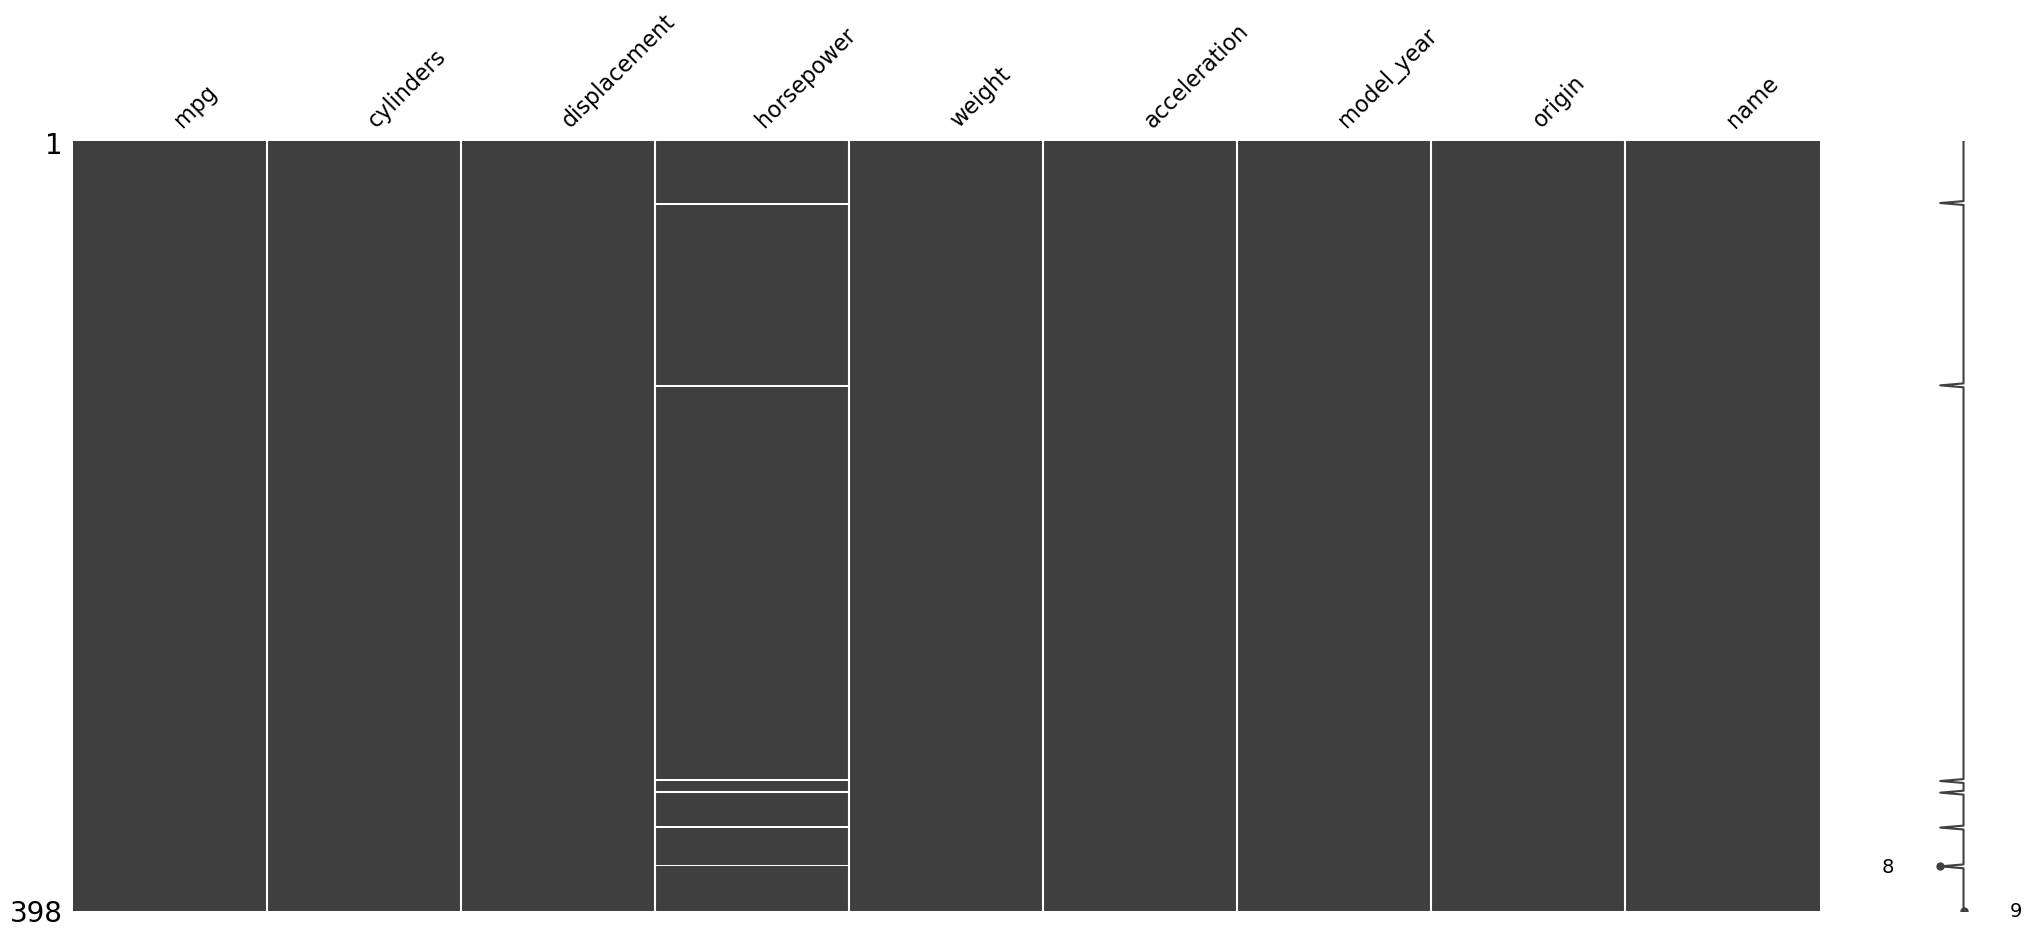

In [99]:
# 싹 다 판다스와 연동됨
mino.matrix(mpg)

In [ ]:
# 위 그림을 보면 6개의 미싱데이터 위치를 알 수 있음
# 패턴도 찾아낼 수 있음.
# 위 데이터를 수집했던 상황 등을 또 알아야 함.
# 데이터 프레임 뒤에도 진실이 있음. 그 진실은 숨겨져 있으니 파악할 줄 알아야 함

In [ ]:
# 지금까지 한 것 정리
# 1. messy -> data is dirty! => Because of human, machine
# 2. 원인(사람 혹은 기계의 실수)을 알았으니 잘못된 것을 찾아야 함
#   -> 찾고 막을 줄 알아야 하고 고칠 줄도 알아야 함. => 판다스로 가능
# 3. 고치기 위해서 선택할 수 있음. 데이터 선택(인덱싱/슬라이싱).
# 4. 선택을 하면 고치는 것 뿐만 아니라 통계값을 낼 수 있음
# 5. 통계값을 내려고 봤더니 count에 주목. masked array 개념 참고
# 6. missing data 를 알아내는, 보는 테크닉을 하고 있음
#   -> 전체 데이터프레임을 보기보다 그림을 보는 것이 더 좋음
#   -> 그림 우월성 효과 => 이것이 바로 시각화를 하는 이유
#   -> 그림을 보고 각 상황별 해석을 해야함

In [100]:
# EDA 테크닉 중 하나
!pip install -U sidetable
# -U 는 설치되어 있는데 최신 버전이 아니면 최신버전으로 해라

In [101]:
# 자동완성에서 없었음
mpg.stb

AttributeError: 'DataFrame' object has no attribute 'stb'

In [102]:
import sidetable

In [103]:
mpg.stb
# 판다스에서 데코레이터가 있는지 없는지 확인하고 있으면 이 기능을 추가함 => AOP

In [105]:
mpg.stb.counts()

,count,unique,most_freq,most_freq_count,least_freq,least_freq_count
origin,398,3,usa,249,europe,70
cylinders,398,5,4,204,5,3
model_year,398,13,73,40,74,27
displacement,398,82,97.0,21,80.0,1
horsepower,392,93,150.0,22,66.0,1
acceleration,398,95,14.5,23,21.8,1
mpg,398,129,13.0,20,32.2,1
name,398,305,ford pinto,6,mazda glc deluxe,1
weight,398,351,1985,4,3245,1


In [107]:
mpg.stb.freq()

TypeError: SideTableAccessor.freq() missing 1 required positional argument: 'cols'

In [108]:
mpg.stb.freq('origin')

AttributeError: Must pass a list of columns

In [109]:
mpg.stb.freq(['origin'])
# 테이블 선택하고 통계값을 내줌.
# 그래프가 눈에 좀 더 잘 들어옴
# sidetable 인 이유는 표 옆에서 설명해주는 표라는 뜻

,origin,count,percent,cumulative_count,cumulative_percent
0,usa,249,62.562814,249,62.562814
1,japan,79,19.849246,328,82.412060
2,europe,70,17.587940,398,100.000000


In [ ]:
# 즉 선택을 통한 데이터의 이해를 할 수 있다.
# 전체 데이터도 이해할 수 있지만, 특정 일부 데이터를 가지고 데이터를 이해할 수 있음.
# 숫자에 대한 이해는 수학/통계가 기반이다.
# 다시 선택하는 이유는, 그래프 그리거나, 통계값 보거나 등등 할 수 있어서

In [ ]:
# 이제 선택이 되면, 그 다음은 무엇을 해야할까?
# 데이터 각각은 알겠는데, 잘못된 게 값만 있지는 않음. 구조 자체가 잘못될 수도 있음.
# 그러면 구조 잘못됐다는 것을 알아야 함.
# 그 전에 내일 aggregation 분석부터 할 것.